In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader as data

In [2]:
start = '2010-01-01'
end = '2020-12-31'

df = data.DataReader('AAPL','yahoo',start,end) #aapl apple stock
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,7.619643,7.520000,7.611786,7.526071,352410800.0,6.444381
2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.544687
2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.556003
2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.451721
2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.439793


In [3]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-12-24,133.460007,131.100006,131.320007,131.970001,54930100.0,130.994522
2020-12-28,137.339996,133.509995,133.990005,136.690002,124486200.0,135.679642
2020-12-29,138.789993,134.339996,138.050003,134.869995,121047300.0,133.873077
2020-12-30,135.990005,133.399994,135.580002,133.720001,96452100.0,132.731583
2020-12-31,134.740005,131.720001,134.080002,132.690002,99116600.0,131.709198


In [4]:
# now to reset the index so that date would no longer be the  index coloumn 
df = df.reset_index()
df

,Date,High,Low,Open,Close,Volume,Adj Close
0,2009-12-31,7.619643,7.520000,7.611786,7.526071,352410800.0,6.444381
1,2010-01-04,7.660714,7.585000,7.622500,7.643214,493729600.0,6.544687
2,2010-01-05,7.699643,7.616071,7.664286,7.656429,601904800.0,6.556003
3,2010-01-06,7.686786,7.526786,7.656429,7.534643,552160000.0,6.451721
4,2010-01-07,7.571429,7.466071,7.562500,7.520714,477131200.0,6.439793
...,...,...,...,...,...,...,...
2765,2020-12-24,133.460007,131.100006,131.320007,131.970001,54930100.0,130.994522
2766,2020-12-28,137.339996,133.509995,133.990005,136.690002,124486200.0,135.679642
2767,2020-12-29,138.789993,134.339996,138.050003,134.869995,121047300.0,133.873077
2768,2020-12-30,135.990005,133.399994,135.580002,133.720001,96452100.0,132.731583


In [5]:
df = df.drop(['Date','Adj Close'], axis=1)
df

,High,Low,Open,Close,Volume
0,7.619643,7.520000,7.611786,7.526071,352410800.0
1,7.660714,7.585000,7.622500,7.643214,493729600.0
2,7.699643,7.616071,7.664286,7.656429,601904800.0
3,7.686786,7.526786,7.656429,7.534643,552160000.0
4,7.571429,7.466071,7.562500,7.520714,477131200.0
...,...,...,...,...,...
2765,133.460007,131.100006,131.320007,131.970001,54930100.0
2766,137.339996,133.509995,133.990005,136.690002,124486200.0
2767,138.789993,134.339996,138.050003,134.869995,121047300.0
2768,135.990005,133.399994,135.580002,133.720001,96452100.0


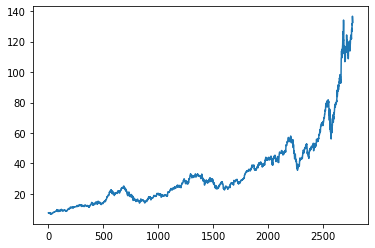

In [6]:
plt.plot(df.Close)

In [7]:
#moving average for 100 values

ma100 = df.Close.rolling(100).mean()
ma100
# now n the below dataset you can see that the moving average for first 100 tearms are null but  for the next all value its have some integer.

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
2765    118.223525
2766    118.489800
2767    118.699475
2768    118.925550
2769    119.125175
Name: Close, Length: 2770, dtype: float64

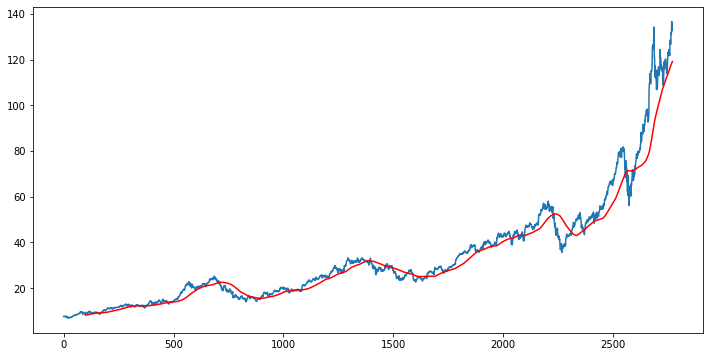

In [8]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')

In [9]:
ma200 = df.Close.rolling(200).mean()
ma200

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
2765     99.158737
2766     99.494725
2767     99.866312
2768    100.218837
2769    100.573950
Name: Close, Length: 2770, dtype: float64

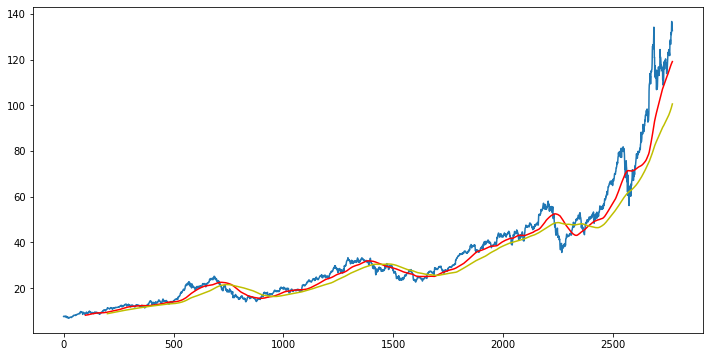

In [10]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'y')

In [11]:
# we have to split data into train data and test data
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

print(data_training.shape)
print(data_testing.shape)


(1938, 1)
(832, 1)


In [12]:
data_training.head()

,Close
0,7.526071
1,7.643214
2,7.656429
3,7.534643
4,7.520714


In [13]:
data_testing.head()

,Close
1938,39.912498
1939,39.570000
1940,39.970001
1941,39.667500
1942,39.682499


In [14]:
from sklearn.preprocessing import MinMaxScaler

In [15]:
scaler = MinMaxScaler(feature_range=(0,1))
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.01953359],
       [0.02296349],
       [0.0233504 ],
       ...,
       [0.96032627],
       [0.98133429],
       [0.97664957]])

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
data_training.shape

(1938, 1)

In [19]:
x_train = []
y_train = []

for i in range(100,data_training.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])

x_train    
    

[array([[1.95335915e-02],
        [2.29634861e-02],
        [2.33504029e-02],
        [1.97845784e-02],
        [1.93767333e-02],
        [2.08407146e-02],
        [1.88852864e-02],
        [1.63860414e-02],
        [1.94499338e-02],
        [1.81741962e-02],
        [1.45142569e-02],
        [2.40405507e-02],
        [2.05793123e-02],
        [1.67520297e-02],
        [5.96045547e-03],
        [1.15235649e-02],
        [1.45247141e-02],
        [1.65533707e-02],
        [7.57082375e-03],
        [1.04432473e-05],
        [2.80244820e-03],
        [3.98408488e-03],
        [7.50808050e-03],
        [0.00000000e+00],
        [3.56579653e-03],
        [2.16457243e-03],
        [4.32917277e-03],
        [3.21026539e-03],
        [6.92249076e-03],
        [8.71064555e-03],
        [1.18686528e-02],
        [1.09798180e-02],
        [1.13771640e-02],
        [1.00595836e-02],
        [8.75246043e-03],
        [5.23892202e-03],
        [9.00344740e-03],
        [1.04046715e-02],
        [1.3

In [20]:
x_train ,y_train = np.array(x_train) , np.array(y_train)

In [21]:
# Machine learning MOdel

from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential 

In [22]:
model = Sequential()
model.add(LSTM(units =50,activation='relu',return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units =60,activation='relu',return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units =80,activation='relu',return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units =120,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [25]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train,y_train,epochs=50)

Epoch 1/50
58/58 [==============================] - 10s 131ms/step - loss: 0.0080
Epoch 2/50
58/58 [==============================] - 7s 128ms/step - loss: 0.0065
Epoch 3/50
58/58 [==============================] - 8s 133ms/step - loss: 0.0056
Epoch 4/50
58/58 [==============================] - 8s 132ms/step - loss: 0.0051
Epoch 5/50
58/58 [==============================] - 7s 129ms/step - loss: 0.0055
Epoch 6/50
58/58 [==============================] - 8s 137ms/step - loss: 0.0046
Epoch 7/50
58/58 [==============================] - 8s 130ms/step - loss: 0.0046
Epoch 8/50
58/58 [==============================] - 8s 130ms/step - loss: 0.0043
Epoch 9/50
58/58 [==============================] - 8s 132ms/step - loss: 0.0043
Epoch 10/50
58/58 [==============================] - 8s 130ms/step - loss: 0.0041
Epoch 11/50
58/58 [==============================] - 7s 128ms/step - loss: 0.0039
Epoch 12/50
58/58 [==============================] - 7s 129ms/step - loss: 0.0036
Epoch 13/50
58/58 [=====

In [ ]:
model.save('keras_model.h5')

In [ ]:
past_100_days = data_training.tail(100)

In [ ]:
final_df = pd.concat([past_100_days,data_testing],ignore_index=True)
final_df.head()

In [ ]:
input_data = scaler.fit_transform(final_df)
input_data

In [ ]:
x_test =[]
y_test =[]
for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

In [ ]:
x_test ,y_test = np.array(x_test) , np.array(y_test)
print(x_test)
print(y_test)

In [ ]:
x_test.shape

In [ ]:
y_test.shape

In [ ]:
# now we have to do prediction 

y_predicted = model.predict(x_test)

In [ ]:
y_predicted.shape

In [ ]:
y_test

In [ ]:
scaler.scale_

In [ ]:
scale_factor = 1/0.00988704
y_predicted = y_predicted * scale_factor
y_test = y_test*scale_factor

In [ ]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b',label='Original Price')
plt.plot(y_predicted,'r',label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()